# Unsupervised Learning

## Machine Learning Methods 


### Module 5: Unsupervised Learning

### Instructor: Farhad Pourkamali



### Overview 
<hr style="border:2px solid gray">

* Unsupervised learning deals with $\color{red}{\text{unlabeled data}}$, meaning the model is not provided with output labels during training

$$
\mathcal{D} = \{ \mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_N \}, \quad \text{no } y \text{ during training}
$$

$$
\mathbf{X} =
\begin{bmatrix}
     x_{11} & x_{12} & \dots & x_{1D}  \\[5pt]
     x_{21} & x_{22} & \dots & x_{2D} \\[5pt]
     \vdots & \vdots & \ddots & \vdots \\[5pt]
     x_{N1} & x_{N2} & \dots & x_{ND} 
\end{bmatrix}\in\mathbb{R}^{N\times D}
$$

* The goal is to identify patterns, structures, or relationships within the data without explicit guidance from labeled examples 
* Labeling data for supervised learning can be a time-consuming and expensive task, especially when dealing with large data sets or complex tasks that require domain expertise
   
* Suppose we have a data set of MRI brain scans where each sample represents a patient, and our goal is to classify them into three categories:
    * Healthy
    * Early-stage Alzheimer’s
    * Late-stage Alzheimer’s

    Since manually labeling MRI scans is costly, we can use unsupervised learning to group similar scans without human input. A recent paper in the Journal of Advances in Biomarker Sciences and Technology: https://www.sciencedirect.com/science/article/pii/S2543106424000152
     
   
* **Clustering methods** aim to partition a data set into clusters or groups in such a way that data points within the same cluster are more similar to each other than to those in other clusters
    * There is no universal definition of what a cluster is
        * It depends on the context and different algorithms will capture different kinds of clusters 
    * Thus, the notion of similarity is crucial in clustering methods 

* We cover three popular clustering techniques and evaluation strategies in this module
    + K-means clustering (https://youtu.be/0COGLR7hUvI)
    + (Video for the rest of this module: https://youtu.be/lJsVyPOk7Ug)
    + Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
    + Gaussian mixtures 
    + Evaluation 
        + Internal measures (cohesion and separation): Silhouette Coefficient 
        + External measures (compare with ground-truth labels): Normalized Mutual Information

### K-means clustering
<hr style="border:2px solid gray">

* Assume we have $K$ cluster centers $\boldsymbol{\mu}_k, k=1,\ldots,K,$ in $\mathbb{R}^D$, so we can cluster the data by assigning each sample $\mathbf{x}_n$ to its closest center

$$z_n^*=\underset{k\in\{1,\ldots,K\}}{\mathrm{argmin}} \|\mathbf{x}_n - \boldsymbol{\mu}_k\|_2^2$$

* But, we don't know the cluster centers, so we should minimize the following loss function

$$\sum_{n=1}^N \|\mathbf{x}_n - \boldsymbol{\mu}_{z_n}\|_2^2$$

* For a specific data point $\mathbf{x}_n$, we can rewrite:

$$
\boldsymbol{\mu}_{z_n} = \sum_{k=1}^{K} z_{nk} \boldsymbol{\mu}_k
$$

as a matrix-vector multiplication

* The row vector of $\mathbf{Z}$ corresponding to $\mathbf{x}_n$ is:

$$
[z_{n1}, z_{n2}, \dots, z_{nK}]
$$

Note that only one of these values is 1 (the rest are 0)


* Each row of $\mathbf{M}$ represents a cluster center $\boldsymbol{\mu}_k$:

$$
\mathbf{M} =
\begin{bmatrix}
    \boldsymbol{\mu}_1 \\
    \boldsymbol{\mu}_2 \\
    \vdots \\
    \boldsymbol{\mu}_K
\end{bmatrix}
$$

where each $\boldsymbol{\mu}_k$ is a row vector in $\mathbb{R}^D$

* Multiplying the row vector $[z_{n1}, z_{n2}, \dots, z_{nK}]$ with $\mathbf{M}$ selects the assigned cluster:

$$
[z_{n1}, z_{n2}, \dots, z_{nK}]
\begin{bmatrix}
    \boldsymbol{\mu}_1 \\
    \boldsymbol{\mu}_2 \\
    \vdots \\
    \boldsymbol{\mu}_K
\end{bmatrix}
=
\boldsymbol{\mu}_{z_n}
$$

Thus, our term simplifies as:

$$
\mathbf{x}_n - \sum_{k=1}^{K} z_{nk} \boldsymbol{\mu}_k = \mathbf{x}_n - [z_{n1}, z_{n2}, \dots, z_{nK}]
\begin{bmatrix}
    \boldsymbol{\mu}_1 \\
    \boldsymbol{\mu}_2 \\
    \vdots \\
    \boldsymbol{\mu}_K
\end{bmatrix}
$$

which is just:

$$
\mathbf{x}_n - \mathbf{Z}_n \mathbf{M}
$$

where $\mathbf{Z}_n$ is the row vector of $\mathbf{Z}$ corresponding to $\mathbf{x}_n$


* Hence, for the entire data set, we have:

$$J(\mathbf{M},\mathbf{Z})=\sum_{n=1}^N \|\mathbf{x}_n - \boldsymbol{\mu}_{z_n}\|_2^2 = \|\mathbf{X} - \mathbf{Z}\mathbf{M}\|_F^2$$

* $\mathbf{X}\in\mathbb{R}^{N\times D}$ (data matrix), $\mathbf{Z}\in[0,1]^{N\times K}$ (membership matrix), and $\mathbf{M}\in\mathbb{R}^{K\times D}$ (matrix of cluster centers)
    * Frobenius norm: $\|\mathbf{A}\|_F^2= \sum_{i}\sum_{j} a_{ij}^2$

* K-means clustering algorithm  
    * Start by placing the centers randomly (pick $K$ instances at random)
    * Iterate over the following two steps 
        + Assign each instance to the cluster whose center is closest 
        + Update each cluster center by computing the mean of instances in that cluster

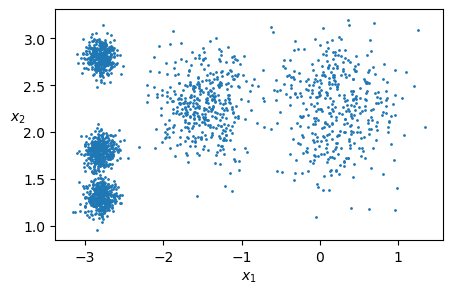

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# We create a synthetic data set with 5 clusters or blobs

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1]) 

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7) 

plt.rcParams.update({'font.size': 10, "figure.figsize": (5,3)})
plt.scatter(X[:, 0], X[:, 1], s=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

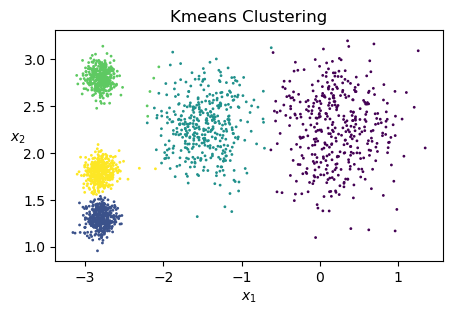

In [2]:
# Apply K-means clustering to this data set 

# caveat: the number of clusters must be defined
kmeans = KMeans(n_clusters=5, random_state=1) 

y_pred = kmeans.fit_predict(X)

plt.rcParams.update({'font.size': 10, "figure.figsize": (5,3)})
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.title('Kmeans Clustering')
plt.show()

In [3]:
# find cluster centers
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80037642,  1.30082566],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999]])

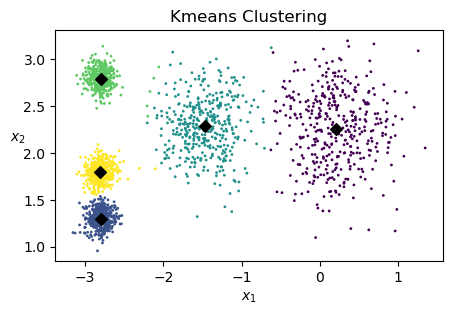

In [4]:
# Plot cluster centers
plt.rcParams.update({'font.size': 10, "figure.figsize": (5,3)})
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=1)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='k', marker='D')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.title('Kmeans Clustering')
plt.show()

* To create a K-Means model, specify the number of clusters and other optional parameters: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [5]:
# We can predict the labels of new instances

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

### K-means clustering and initialization
<hr style="border:2px solid gray">

* K-means clustering needs to be initialized carefully

* Therefore, we can use multiple restarts, i.e., we run the algorithm multiple times from different random starting points, and then pick the best solution
    * Use the "n_init" argument
    * But, we can use better initialization techniques
    
* The K-means++ algorithm

    * Pick the centers sequentially so as to “cover” the data
    * Each point is picked with probability proportional to its squared distance to its cluster center
    * Thus, at each iteration $t$, we get 

$$p(\boldsymbol{\mu}_t=\mathbf{x}_n)=\frac{D_{t-1}(\mathbf{x}_n)}{\sum_{n'} D_{t-1}(\mathbf{x}_{n'})}$$

where 

$$D_{t-1}(\mathbf{x}_n)=\min_{k\in\{1,\ldots,t-1\}}\|\mathbf{x}_n - \boldsymbol{\mu}_k\|_2^2$$


### Finding the optimal number of clusters 
<hr style="border:2px solid gray">

* A natural choice for picking $K$ is to pick the value that minimizes the reconstruction error

$$J(\mathbf{M},\mathbf{Z})=\sum_{n=1}^N \|\mathbf{x}_n - \boldsymbol{\mu}_{z_n}\|_2^2 = \|\mathbf{X} - \mathbf{Z}\mathbf{M}\|_F^2$$

* This is known as the inertia or within-cluster sum-of-squares criterion
* This idea wouldn't work because the inertia monotonically decreases with $K$
* However, we can plot the inertia as a function of $K$ and find the elbow
* The elbow point is the value of $K$ where adding more clusters no longer significantly reduces inertia

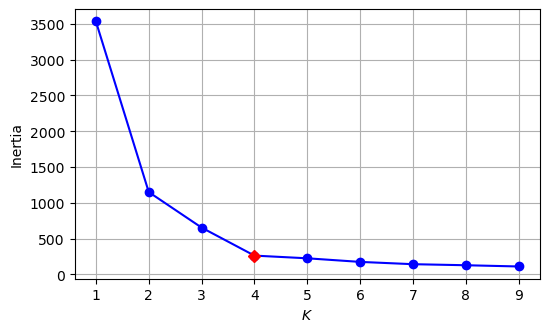

In [6]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(6, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.plot(4, inertias[3], 'rD')
plt.xlabel("$K$")
plt.ylabel("Inertia")
plt.grid()
plt.show()

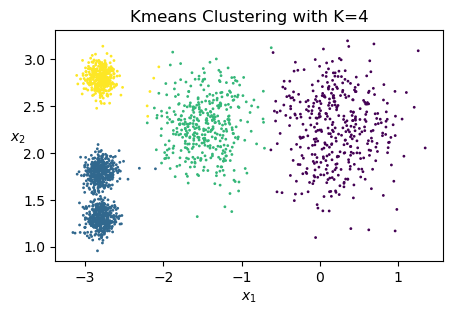

In [7]:
# solve the problem with K=4

kmeans = KMeans(n_clusters=4, random_state=1)

y_pred = kmeans.fit_predict(X)

plt.rcParams.update({'font.size': 10, "figure.figsize": (5,3)})
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.title('Kmeans Clustering with K=4')
plt.show()

### Using silhouette score instead of inertia
<hr style="border:2px solid gray">

* The Silhouette Score evaluates clustering quality by measuring how well-separated clusters are. For each data point $\mathbf{x}_n$, we compute:

    - $a_n$ (Intra-cluster distance): The average distance from $\mathbf{x}_n$ to all other points in the same cluster.
    - $b_n$ (Inter-cluster distance): The average distance from $\mathbf{x}_n$ to the nearest neighboring cluster (the closest cluster it is *not* part of).

The Silhouette Coefficient for each data point is defined as:

$$
s_n = \frac{b_n - a_n}{\max(a_n, b_n)}
$$

where:
- $-1 \leq s_n \leq 1$,
- $s_n \approx 1$ indicates well-clustered points (well-separated clusters),
- $s_n \approx 0$ suggests overlapping clusters,
- $s_n \approx -1$ indicates misclassified points.

Finally, the overall Silhouette Score is the average across all data points:

$$
S = \frac{1}{N} \sum_{n=1}^{N} s_n
$$

where $N$ is the total number of samples

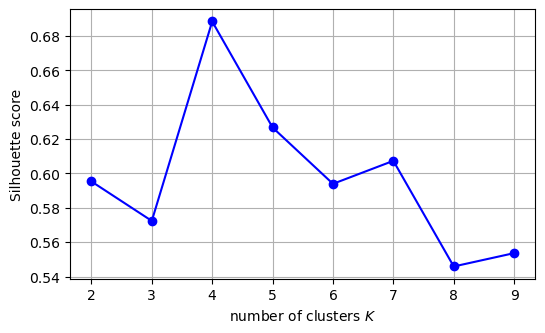

In [8]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(6, 3.5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("number of clusters $K$")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()

### DBSCAN
<hr style="border:2px solid gray">

* This algorithm defines clusters as continuous regions of high density 

    * For each instance, it counts how many samples are located within a small distance $\varepsilon$ from it ($\varepsilon$-neighborhood)
    * If an instance has at least "min_samples" samples in its $\varepsilon$-neighborhood, then it is considered a “core instance”
    * All instances in the neighborhood of a core instance belong to the same cluster
    * Any instance that is not a “core instance” and does not have one in its neighborhood is considered an anomaly  

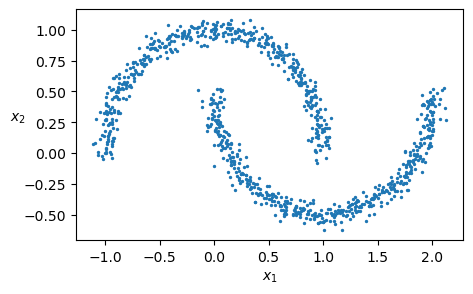

In [9]:
# Create a nonlinear data set 

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

plt.rcParams.update({'font.size': 10, "figure.figsize": (5,3)})
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

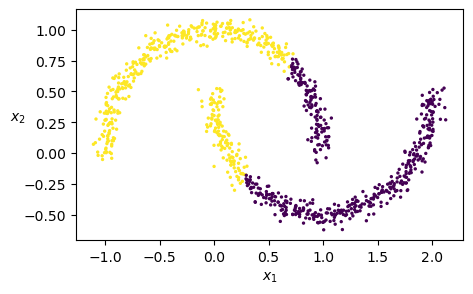

In [10]:
# Does K-means clustering work?

km = KMeans(n_clusters=2,  random_state=42)
km.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=km.labels_, s=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

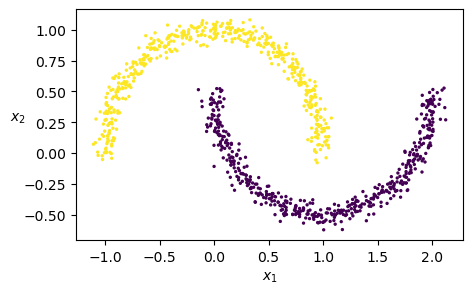

In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)

dbscan.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, s=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

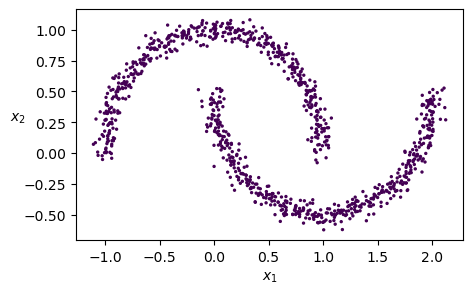

In [12]:
# Does DBSCAN work with this value of eps? 

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, s=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

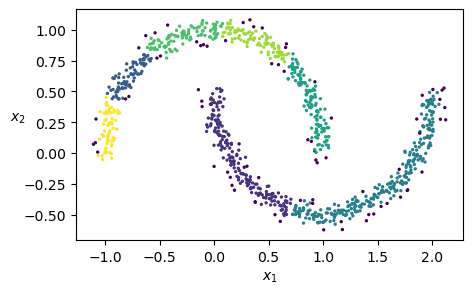

In [13]:
# Does DBSCAN work with this value of eps? 

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, s=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

### Gaussian Mixtures
<hr style="border:2px solid gray">

* The Gaussian Mixture Model (GMM) assumes that the data is generated from a mixture of multiple Gaussian distributions, each representing a cluster

* The goal of the GMM is to identify these Gaussian distributions and estimate their parameters to assign data points to the most probable clusters

$$
P(\mathbf{x}) = \sum_{k=1}^{K} \pi_k \mathcal{N}(\mathbf{x} | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)
$$

 - $\pi_k$ is the mixing coefficient of the $k$-th Gaussian component, representing the probability of selecting the $k$-th component
        - If $\pi_k$ is high, cluster $k$ is dominant in the data set
        - If $\pi_k$ is low, cluster $k$ is rare

- $\boldsymbol{\mu}_k$ is the mean vector of the $k$-th Gaussian component

- $\boldsymbol{\Sigma}_k$ is the covariance matrix of the $k$-th Gaussian component

- $\mathcal{N}(\mathbf{x} | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)$ is the probability density function of the multivariate Gaussian distribution with mean $\boldsymbol{\mu}_k$ and covariance $\boldsymbol{\Sigma}_k$

* Unlike K-Means, where a data point is assigned to exactly one cluster, GMM assigns a probability of belonging to each cluster 

* The probability that $\mathbf{x}$ belongs to the $k$-th cluster is given by:

$$
P(k \mid \mathbf{x}) = \frac{\pi_k \mathcal{N}(\mathbf{x} \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(\mathbf{x} \mid \boldsymbol{\mu}_j, \boldsymbol{\Sigma}_j)}
$$


* Each data point has a soft assignment (probability) to multiple clusters, rather than a hard assignment.

* Thus, GMM allows for overlapping clusters, making it more flexible than K-Means.



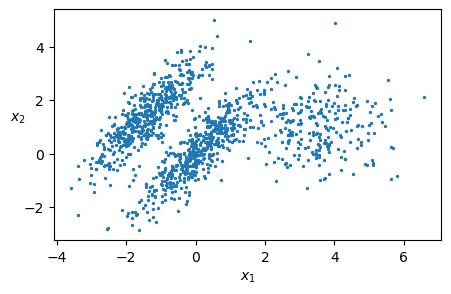

In [14]:
# create a 2D data set in the form of a mixture model 
# Thus, we use make_blobs two times 

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)

X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)

X2 = X2 + [6, -8]

X = np.r_[X1, X2]
y = np.r_[y1, y2]

plt.rcParams.update({'font.size': 10, "figure.figsize": (5,3)})
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

In [15]:
from sklearn.mixture import GaussianMixture

# number of clusters should be provided 
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)

gm.fit(X)


GaussianMixture(n_components=3, n_init=10, random_state=42)

In [16]:
# pi_k 

gm.weights_

array([0.40005972, 0.20961444, 0.39032584])

In [17]:
# sigma_k 

gm.covariances_


array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

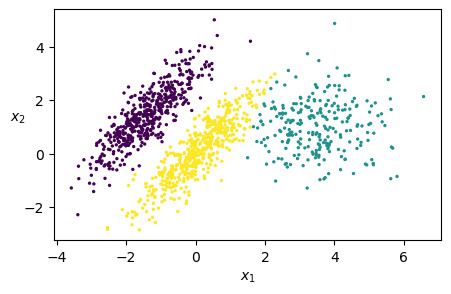

In [18]:
# Plot returned clusters 
y_pred = gm.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

In [19]:
gm.fit_predict(X)[:10]

array([2, 2, 0, 2, 0, 0, 2, 0, 0, 2])

In [20]:
gm.predict_proba(X)[:10]

array([[6.76282339e-07, 2.31833274e-02, 9.76815996e-01],
       [6.74575575e-04, 1.64110061e-02, 9.82914418e-01],
       [9.99922764e-01, 1.99781831e-06, 7.52377580e-05],
       [8.64003688e-06, 8.48983970e-03, 9.91501520e-01],
       [9.99999975e-01, 2.31088296e-08, 2.35665725e-09],
       [9.93716619e-01, 3.52304610e-04, 5.93107648e-03],
       [2.47914411e-11, 6.56144058e-03, 9.93438559e-01],
       [9.68375227e-01, 5.77260043e-04, 3.10475133e-02],
       [9.99990891e-01, 8.70189912e-06, 4.07452914e-07],
       [7.37064964e-05, 1.51236024e-03, 9.98413933e-01]])

### Evaluating Clustering with Normalized Mutual Information (NMI)
<hr style="border:2px solid gray">

In classification, we have ground truth labels and predicted labels, so accuracy is a natural evaluation metric:

$$
\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Samples}}
$$

However, in clustering, we do not have predefined class labels. Instead:

- Clustering assigns data points to clusters without knowing their true class labels.
- Cluster labels are arbitrary (e.g., swapping "Cluster A" and "Cluster B" does not change the clustering).
- Accuracy depends on exact label matching, which is not meaningful for clustering.
- Thus, we need a label-independent metric to measure how well clusters match ground truth groups.

* Solution: Normalized Mutual Information (NMI)
* NMI measures the mutual dependence between true labels and cluster assignments.
* It is invariant to label permutations.
* NMI provides a normalized score between 0 and 1, where:
  - NMI = 1 means perfect clustering.
  - NMI = 0 means no correlation between clusters and true labels.


###  Contingency Table
<hr style="border:2px solid gray">

* A contingency table (also called a confusion matrix for clustering) represents the relationship between true labels and predicted clusters. 

* Each entry $C(i, j)$ in the table represents the number of data points that belong to true class $i$ but were assigned to predicted cluster $j$.
<img src="https://github.com/farhad-pourkamali/MATH4388Online/blob/main/images/contingency.png?raw=true" width=300>

- Rows represent true labels (ground truth).
- Columns represent predicted clusters.
- The values in the table indicate how many points from each true label were assigned to each cluster.

This table allows us to compute:
1. Entropy of True Label $H(Y)$
2. Entropy of Predicted Clusters $H(\hat{Y})$
3. Mutual Information (MI) between true and predicted labels.
4. Normalized Mutual Information (NMI) by normalizing MI.

###  Step 1: Compute Entropy of True Labels 
<hr style="border:2px solid gray">


- Entropy measures the uncertainty or randomness in the distribution of true labels. It is given by:

$$
H(Y) = - \sum_{y \in Y} P(y) \log_2 P(y)
$$

where:
- $P(y)$ is the probability of each true label.
- Higher entropy means more diverse true labels.

* From the contingency table, we compute:

$$
H(Y) =  - \sum_{i} \frac{|Y_i|}{N} \log_2 \frac{|Y_i|}{N}
$$

where:
- $|Y_i|$ is the number of samples in each true class,
- $N$ is the total number of data points.

### Step 2: Compute Entropy of Predicted Labels 
<hr style="border:2px solid gray">


- Similarly, the entropy of predicted clusters is:

$$
H(\hat{Y}) = - \sum_{\hat{y} \in \hat{Y}} P(\hat{y}) \log_2 P(\hat{y})
$$

where:
- $P(\hat{y})$ is the probability of each predicted cluster.
- We compute it using the column sums of the contingency table.

$$
H(\hat{Y}) = - \sum_{j} \frac{|\hat{Y}_j|}{N} \log_2 \frac{|\hat{Y}_j|}{N}
$$


### Step 3: Compute Mutual Information
<hr style="border:2px solid gray">


* Mutual Information (MI) quantifies how much knowing the predicted cluster reduces uncertainty about the true label:

$$
MI(Y, \hat{Y}) = \sum_{y \in Y} \sum_{\hat{y} \in \hat{Y}} P(y, \hat{y}) \log_2 \frac{P(y, \hat{y})}{P(y) P(\hat{y})}
$$

where:
- $P(y, \hat{y})$ is the joint probability (computed from the contingency table).
- If $P(y, \hat{y})$ is high, clustering aligns well with ground truth.


### Step 4: Compute Normalized Mutual Information (NMI)
<hr style="border:2px solid gray">


* To ensure values range from 0 to 1, we normalize MI:

$$
NMI(Y, \hat{Y}) = \frac{MI(Y, \hat{Y})}{\sqrt{H(Y) H(\hat{Y})}}
$$


 [0 1 1 1 1 0 1 0 1 0] 
 [1 1 0 0 0 1 0 1 0 1]


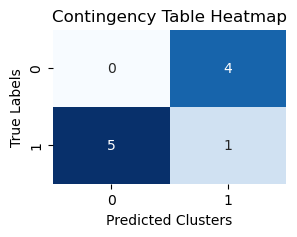

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import normalized_mutual_info_score

# Define true labels and predicted cluster assignments
true_labels = np.array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0])
predicted_clusters = np.array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1])  # Different label ordering

print('\n',true_labels, '\n', predicted_clusters)

# Step 1: Compute the contingency table (confusion matrix for clustering)
contingency_table = pd.crosstab(pd.Series(true_labels, name='True Labels'), 
                                pd.Series(predicted_clusters, name='Predicted Clusters'))


# Visualizing the contingency table as a heatmap
plt.figure(figsize=(3, 2))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels")
plt.title("Contingency Table Heatmap")
plt.show()

In [22]:
# Step 2: Compute entropy of true labels H(Y)
p_y = contingency_table.sum(axis=1) / contingency_table.values.sum()
H_Y = -np.sum(p_y * np.log2(p_y))

print(p_y, H_Y)


True Labels
0    0.4
1    0.6
dtype: float64 0.9709505944546686


In [23]:
# Step 3: Compute entropy of predicted labels H(Y_hat)
p_y_hat = contingency_table.sum(axis=0) / contingency_table.values.sum()
H_Y_hat = -np.sum(p_y_hat * np.log2(p_y_hat))

print(p_y_hat, H_Y_hat)

Predicted Clusters
0    0.5
1    0.5
dtype: float64 1.0


In [24]:
# Step 4: Compute mutual information MI(Y, Y_hat)
joint_prob = contingency_table / contingency_table.values.sum()
p_joint = joint_prob.values

# Avoid log(0) issue by setting zeros to a small value before applying log
p_joint = np.where(p_joint == 0, 1e-10, p_joint)  
p_y = np.where(p_y == 0, 1e-10, p_y)
p_y_hat = np.where(p_y_hat == 0, 1e-10, p_y_hat)

MI = np.sum(p_joint * np.log2(p_joint / (p_y[:, None] * p_y_hat[None, :])))

print(MI)


0.6099865439212522


In [25]:
# Step 5: Compute normalized mutual information (NMI)
NMI = MI / np.sqrt(H_Y * H_Y_hat)

# Compute NMI using sklearn for comparison
NMI_sklearn = normalized_mutual_info_score(true_labels, predicted_clusters)

print(f"Normalized Mutual Information (NMI - Manual): {NMI:.4f}")
print(f"Normalized Mutual Information (NMI - sklearn): {NMI_sklearn:.4f}")


Normalized Mutual Information (NMI - Manual): 0.6190
Normalized Mutual Information (NMI - sklearn): 0.6190


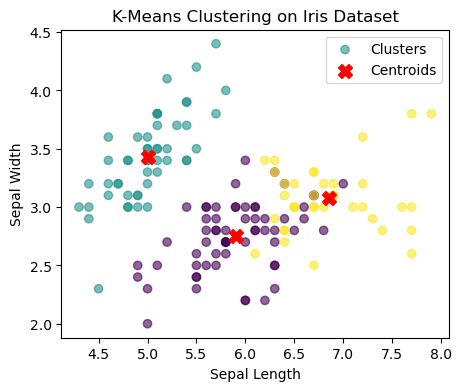

Normalized Mutual Information (NMI): 0.7582


In [26]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y_true = iris.target  # True labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Apply K-Means clustering (without using true labels)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)  # Cluster assignments

# Compute NMI Score
nmi_score = normalized_mutual_info_score(y_true, y_pred)

# Visualizing clustering results (Sepal Length vs Sepal Width)
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.6, label="Clusters")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100, label="Centroids")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()

# Print the computed NMI Score
print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")
